In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [3]:
2**np.arange(1,21) / np.arange(1, 21)

array([2.00000000e+00, 2.00000000e+00, 2.66666667e+00, 4.00000000e+00,
       6.40000000e+00, 1.06666667e+01, 1.82857143e+01, 3.20000000e+01,
       5.68888889e+01, 1.02400000e+02, 1.86181818e+02, 3.41333333e+02,
       6.30153846e+02, 1.17028571e+03, 2.18453333e+03, 4.09600000e+03,
       7.71011765e+03, 1.45635556e+04, 2.75941053e+04, 5.24288000e+04])

**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [4]:
0.1**(3*np.arange(6)) @ 0.2**(4*np.arange(6))

1.00000160000256

**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [5]:
matr = np.zeros((8,8))
matr[::2, ::2] = 1
matr[::-2, ::-2] = 1
matr


array([[1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.]])

**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [6]:
X = np.random.random((5, 2))

rho = np.sqrt(X.T[1]**2 + X.T[0]**2)
phi = np.arctan(X.T[1] / X.T[0])

X_polar = np.array([rho, phi]).T
print(X)
print(X_polar)

[[0.41263563 0.57633014]
 [0.48097743 0.75780857]
 [0.16710129 0.68471065]
 [0.10697007 0.24087373]
 [0.92505593 0.21409961]]
[[0.70881915 0.94943184]
 [0.89755954 1.00525557]
 [0.70480601 1.33142869]
 [0.26355787 1.15286644]
 [0.94950888 0.2274404 ]]


**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [7]:
X = np.random.random((10, 10))

i, j = np.where(X == X.flatten()[np.argmax(X)])
print('i:', i[0], 'j:', j[0], 'max value:', X[i[0], j[0]])

i: 8 j: 7 max value: 0.9943913155522458


**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

In [10]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))

#Косинусное расстояние
cosines = (X @ y.T).T / (np.sqrt(X.T[1]**2 + X.T[0]**2) * np.linalg.norm(y))
index_cos = np.where(cosines[0] == np.min(cosines[0]))[0][0]
print('Точка из X, наиболее близкая к y в смысле косинусного расстояния: ', X[index_cos])

#Евклидово расстояние
distances = np.sqrt((X - y).T[1]**2 + (X - y).T[0]**2) 
index_euc = np.where(distances == np.min(distances))[0][0]
print('Точка из X, наиболее близкая к y в смысле евклидового расстояния: ', X[index_euc])
print(' y = ', y)

Точка из X, наиболее близкая к y в смысле косинусного расстояния:  [0.35489    0.70822232]
Точка из X, наиболее близкая к y в смысле евклидового расстояния:  [0.78010471 0.42591154]
 y =  [[0.83145761 0.3571922 ]]


**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

C:\Anaconda3\envs\classification2021\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

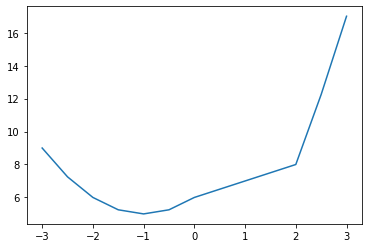

In [12]:
a = np.arange(-3, 0, 0.5)
b = np.arange(0, 2, 0.5)
c = np.arange(2, 3.5, 0.5)

f = lambda x: x**2 + 2*x + 6
g = lambda x: x + 6
h = lambda x: x**2 + 4*x - 4

X = np.hstack([a,b,c])
Y = np.hstack([f(a), g(b), h(c)])

sns.lineplot(X, Y)

**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [14]:
X = np.random.random((10, 10))

X = X - np.mean(X, axis=1).reshape(-1, 1)
np.round(X.mean(axis=1), 4)

array([ 0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,  0.])

**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

In [15]:
X = np.random.normal(loc=5, scale=2.0, size=1000)
n = X.shape[0]
sample_mean = (1 / n) * np.sum(X)
sample_variance = (1 / n) * np.sum((X - sample_mean) ** 2)
print("mu: ", sample_mean, " sigma^2: ", sample_variance)


mu:  5.025385479409011  sigma^2:  3.916539665299313


**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [18]:
X = np.array([np.arange(5)] * 5)
np.array(list(map(np.roll, X, np.arange(0, -5, -1))))


array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 0],
       [2, 3, 4, 0, 1],
       [3, 4, 0, 1, 2],
       [4, 0, 1, 2, 3]])

**11.** Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [19]:
def sample(x, c):
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)    

[3, 0, 4, 0, 0]

Реализуйте данный алгоритм более оптимальным способом, без использования циклов.

In [20]:
from itertools import accumulate


def smart_sample(x, num_samples):
    acc_x = np.array(list(accumulate(x)))
    vals = (np.random.random(num_samples) * sum(x)).reshape(num_samples, 1)
    fancy_matr = (acc_x - vals) > 0
    indices = np.argmax(fancy_matr == True, axis=1)
    return indices


In [22]:
%timeit sample([50, 3, 1, 7, 20], 15)
%timeit smart_sample([50, 3, 1, 7, 20], 15)

169 µs ± 33.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
30.5 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
